Data
====

Resources
----

[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
[QGrid](https://github.com/quantopian/qgrid)

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use('ggplot')

Working with Series
----

In [5]:
x = Series(range(5,10))

In [6]:
x

0    5
1    6
2    7
3    8
4    9
dtype: int64

### We cna treat Series objects much like numpy vectors

In [7]:
x[1:4]

1    6
2    7
3    8
dtype: int64

In [8]:
x.sum(), x.mean(), x.std()

(35, 7.0, 1.5811388300841898)

In [9]:
x**2

0    25
1    36
2    49
3    64
4    81
dtype: int64

In [10]:
x[x >= 8]

3    8
4    9
dtype: int64

### Series can also contain more information than numpy vectors

#### Series index

In [11]:
x.index = list('abcde')
x

a    5
b    6
c    7
d    8
e    9
dtype: int64

In [12]:
x['a':'c']

a    5
b    6
c    7
dtype: int64

In [13]:
x

a    5
b    6
c    7
d    8
e    9
dtype: int64

In [14]:
x.a, x.c, x.e

(5, 7, 9)

#### Working with missing data

In [15]:
y = Series([10, np.nan, np.nan, 13, 14])
y

0    10
1   NaN
2   NaN
3    13
4    14
dtype: float64

In [16]:
z = pd.concat([x, y])
z

a     5
b     6
c     7
d     8
e     9
0    10
1   NaN
2   NaN
3    13
4    14
dtype: float64

In [17]:
z = z.reset_index(drop=True)
z

0     5
1     6
2     7
3     8
4     9
5    10
6   NaN
7   NaN
8    13
9    14
dtype: float64

In [18]:
z.sum(), z.mean(), z.std()

(72.0, 9.0, 3.2071349029490928)

In [19]:
z[z.isnull()]

6   NaN
7   NaN
dtype: float64

In [20]:
z[z.notnull()]

0     5
1     6
2     7
3     8
4     9
5    10
8    13
9    14
dtype: float64

In [21]:
z.fillna(0)

0     5
1     6
2     7
3     8
4     9
5    10
6     0
7     0
8    13
9    14
dtype: float64

In [22]:
z.fillna(method='ffill')

0     5
1     6
2     7
3     8
4     9
5    10
6    10
7    10
8    13
9    14
dtype: float64

In [23]:
z.fillna(method='bfill')

0     5
1     6
2     7
3     8
4     9
5    10
6    13
7    13
8    13
9    14
dtype: float64

In [24]:
z.fillna(z.mean())

0     5
1     6
2     7
3     8
4     9
5    10
6     9
7     9
8    13
9    14
dtype: float64

#### Working with dates / times

We will see more date/time handling in the DataFrame section.

In [25]:
z.index = pd.date_range('01-Jan-2016', periods=len(z))

In [26]:
z

2016-01-01     5
2016-01-02     6
2016-01-03     7
2016-01-04     8
2016-01-05     9
2016-01-06    10
2016-01-07   NaN
2016-01-08   NaN
2016-01-09    13
2016-01-10    14
Freq: D, dtype: float64

In [27]:
z.resample('W', how='sum')

2016-01-03    18
2016-01-10    54
Freq: W-SUN, dtype: float64

In [28]:
z.index.strftime('%b %d, %Y')

array(['Jan 01, 2016', 'Jan 02, 2016', 'Jan 03, 2016', 'Jan 04, 2016',
       'Jan 05, 2016', 'Jan 06, 2016', 'Jan 07, 2016', 'Jan 08, 2016',
       'Jan 09, 2016', 'Jan 10, 2016'], 
      dtype='<U12')

DataFrame
----

### Titanic data

In [137]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

In [41]:
titanic.shape

(891, 15)

In [40]:
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [117]:
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

#### But I really want to see all the data!

In [38]:
import qgrid
qgrid.nbinstall(overwrite=True)

In [39]:
qgrid.show_grid(titanic)

In [42]:
titanic.ix[0]

survived                 0
pclass                   3
sex                   male
age                     22
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object

In [43]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891,891
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,False,False
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0,0
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1,1
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1,1
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,True,True


In [45]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [46]:
titanic.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
           dtype='int64', length=891)

### Indexing

In [170]:
titanic[['sex', 'age', 'class']].head()

,sex,age,class
0,male,22,Third
1,female,38,First
2,female,26,Third
3,female,35,First
4,male,35,Third


In [175]:
titanic[10:15]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
12,0,3,male,20,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
14,0,3,female,14,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True


In [176]:
titanic.ix[10:15, 'age':'fare']

,age,sibsp,parch,fare
10,4,1,1,16.7000
11,58,0,0,26.5500
12,20,0,0,8.0500
13,39,1,5,31.2750
14,14,0,0,7.8542
15,55,0,0,16.0000


In [177]:
titanic.ix[10:15, [1,3,5]]

,pclass,age,parch
10,3,4,1
11,1,58,0
12,3,20,0
13,3,39,5
14,3,14,0
15,2,55,0


In [178]:
titanic[titanic.age < 2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
381,1,3,female,1.00,0,2,15.7417,C,Third,child,False,NaN,Cherbourg,yes,False
386,0,3,male,1.00,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False


#### Sorting and ordering data

In [52]:
titanic.sort_values('age', ascending=True).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


#### Grouping data

In [54]:
sex_class = titanic.groupby(['sex', 'class'])

In [59]:
sex_class.count()

survived  pclass  age  sibsp  parch  fare  embarked  who  \
sex    class                                                              
female First         94      94   85     94     94    94        92   94   
       Second        76      76   74     76     76    76        76   76   
       Third        144     144  102    144    144   144       144  144   
male   First        122     122  101    122    122   122       122  122   
       Second       108     108   99    108    108   108       108  108   
       Third        347     347  253    347    347   347       347  347   

               adult_male  deck  embark_town  alive  alone  
sex    class                                                
female First           94    81           92     94     94  
       Second          76    10           76     76     76  
       Third          144     6          144    144    144  
male   First          122    94          122    122    122  
       Second         108     6          108    108    108  
       Third          347     6          347    347    347

#### Why Kate Winslett survived and Leonardo DiCaprio didn't

In [64]:
df = sex_class.mean()
df['survived']

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

#### Of the females who were in first class, count the number from each embarking town

In [89]:
sex_class.get_group(('female', 'First')).groupby('embark_town').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,43,43,43,38,43,43,43,43,43,43,43,35,43,43
Queenstown,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Southampton,48,48,48,44,48,48,48,48,48,48,48,43,48,48


#### We can aslo get multiple summaries at the same time

In [103]:
mapped_funcs = {'embarked': 'count', 'age': ('mean', 'median'), 'survived': 'sum'}
sex_class.get_group(('female', 'First')).groupby('embark_town').agg(mapped_funcs)

survived        age        embarked
                 sum       mean median    count
embark_town                                    
Cherbourg         42  36.052632     37       43
Queenstown         1  33.000000     33        1
Southampton       46  32.704545     33       48

In [109]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

/Users/cliburn/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


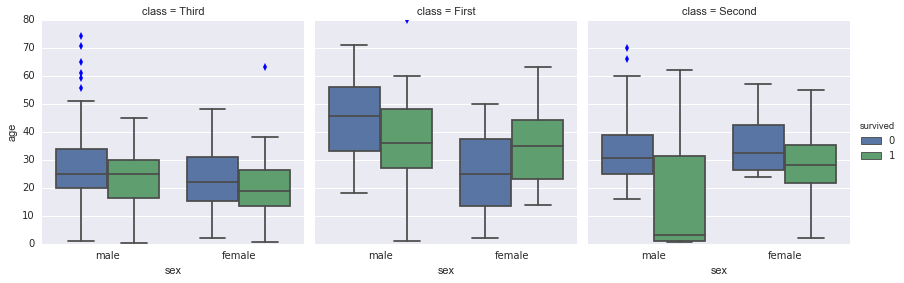

In [150]:
import seaborn as sns
sns.set_context(font_scale=4)
sns.factorplot(x='sex', y='age', hue='survived', col='class', kind='box', data=titanic)
pass

### Apple stock prices

In [33]:
from pandas_datareader import data as web
import datetime

In [36]:
apple = web.DataReader('AAPL', 'google', 
                        start = datetime.datetime(2015, 1, 1),
                        end = datetime.datetime(2015, 12, 31))

In [37]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-05-08,126.68,127.62,126.11,127.62,55550382
2015-05-11,127.39,127.56,125.62,126.32,42035757
2015-05-12,125.60,126.88,124.82,125.86,48160032
2015-05-13,126.15,127.19,125.87,126.01,34694235
2015-05-14,127.41,128.95,127.16,128.95,45203456


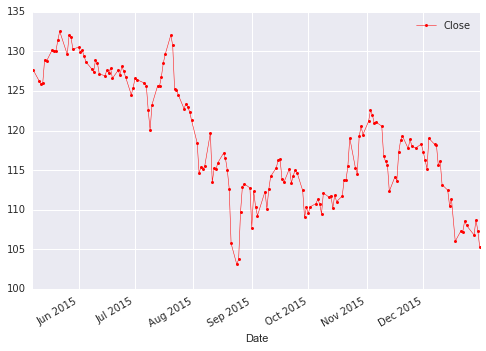

In [163]:
apple.plot.line(y='Close', marker='o', markersize=3, linewidth=0.5, color='red')
pass

Version information
----

In [164]:
%load_ext version_information
%version_information numpy, pandas, seaborn

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.0.1
OS Darwin 15.2.0 x86_64 i386 64bit
numpy 1.10.2
pandas 0.17.1
seaborn 0.6.0
Fri Jan 15 16:07:36 2016 EST